In [0]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import math
import os

import statsmodels.api as sm
from statsmodels.formula.api import ols

**READING** THE **CSV** **FILE** **RETAIL** **CUSTOMER** **REVENUE**

In [0]:
data=pd.read_csv('/content/drive/My Drive/BOLD_L2/final assignment/RetailCustomerRevenue.csv')

In [3]:
data.head()

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
0,C1104,3125,2,6,261,11,9,365,11,2,Area1,2
1,C1111,5298,2,5,323,9,9,218,3,2,Area1,1
2,C1117,4375,2,6,355,11,11,1367,11,2,Area1,2
3,C1128,9700,5,7,418,51,41,2947,51,1,Area1,1
4,C1132,3625,2,7,290,9,9,1233,8,2,Area1,3


In [4]:
data.shape

(2938, 12)

In [5]:
  data.dtypes

PersonID                 object
Amount                    int64
FamilySize                int64
Distance                  int64
Duration                  int64
DirectVisits              int64
OnlineVisits              int64
Quantity                  int64
NumberofFrequentItems     int64
TransactionMode           int64
Area                     object
Occupation                int64
dtype: object

**HERE WE ARE CONVERTING NECESSARY ATTRIBUTES TO CATEGORICAL**

In [0]:
for col in ['FamilySize', 'Distance', 'TransactionMode','Area','Occupation']:
    data[col] = data[col].astype('category')

In [7]:
data.dtypes

PersonID                   object
Amount                      int64
FamilySize               category
Distance                 category
Duration                    int64
DirectVisits                int64
OnlineVisits                int64
Quantity                    int64
NumberofFrequentItems       int64
TransactionMode          category
Area                     category
Occupation               category
dtype: object

**HERE WE ARE MOVING THE TARGET VARIABLE AMOUNT TO THE LAST COLUMN AS IT WILL BE EASY FOR OUR FURTHER OPERATIONS**

In [0]:
df1=data.pop('Amount')
data['Amount']=df1

In [9]:
data.columns

Index(['PersonID', 'FamilySize', 'Distance', 'Duration', 'DirectVisits',
       'OnlineVisits', 'Quantity', 'NumberofFrequentItems', 'TransactionMode',
       'Area', 'Occupation', 'Amount'],
      dtype='object')

In [10]:
data.describe(include='all')

,PersonID,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation,Amount
count,2938,2938.0,2938.0,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.0,2938,2938.0,2938.000000
unique,2938,10.0,21.0,NaN,NaN,NaN,NaN,NaN,2.0,2,3.0,NaN
top,C4857,3.0,6.0,NaN,NaN,NaN,NaN,NaN,2.0,Area1,3.0,NaN
freq,1,1303.0,649.0,NaN,NaN,NaN,NaN,NaN,2414.0,2600,1054.0,NaN
mean,NaN,NaN,NaN,349.146698,16.283186,14.745405,1600.154527,14.780463,NaN,NaN,NaN,4209.432267
std,NaN,NaN,NaN,89.621938,8.494674,7.310646,1920.046598,8.822916,NaN,NaN,NaN,2069.917106
min,NaN,NaN,NaN,100.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,2500.000000
25%,NaN,NaN,NaN,305.000000,11.000000,10.000000,444.000000,10.000000,NaN,NaN,NaN,2897.250000
50%,NaN,NaN,NaN,368.000000,14.000000,13.000000,1028.500000,13.000000,NaN,NaN,NaN,3512.000000
75%,NaN,NaN,NaN,418.000000,19.000000,17.000000,2047.250000,19.000000,NaN,NaN,NaN,4772.500000


**THIS COMMAND SHOWS THERE ARE NO NULL VALUES**

In [11]:

data.isna().sum()

PersonID                 0
FamilySize               0
Distance                 0
Duration                 0
DirectVisits             0
OnlineVisits             0
Quantity                 0
NumberofFrequentItems    0
TransactionMode          0
Area                     0
Occupation               0
Amount                   0
dtype: int64

**FINDING THE CORRELATION BETWEEN NUMERICAL ATTRIBUTES'**

In [12]:
data.corr()

,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,Amount
Duration,1.000000,0.207336,0.196975,0.230608,0.200766,0.122863
DirectVisits,0.207336,1.000000,0.934496,0.298580,0.949014,0.661911
OnlineVisits,0.196975,0.934496,1.000000,0.321901,0.869229,0.751496
Quantity,0.230608,0.298580,0.321901,1.000000,0.302033,0.239952
NumberofFrequentItems,0.200766,0.949014,0.869229,0.302033,1.000000,0.496008
Amount,0.122863,0.661911,0.751496,0.239952,0.496008,1.000000


**VISUALIZATIONS**

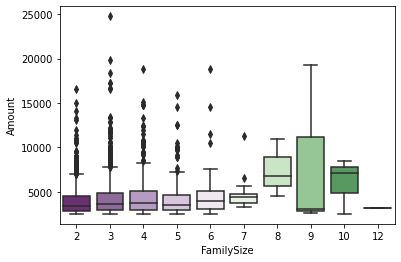

In [13]:
sns.boxplot(x="FamilySize", y="Amount", data=data, palette="PRGn")
plt.show()

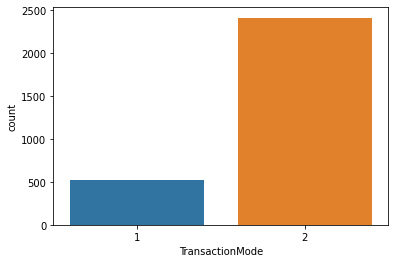

In [14]:
sns.countplot(x="TransactionMode", data=data)
plt.show()

Here we can say that family of size 9 generates more revenue

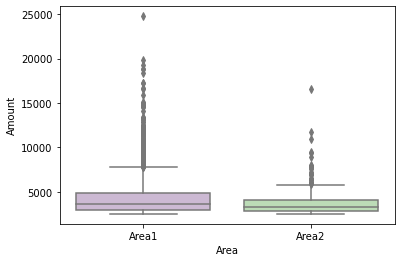

In [15]:
sns.boxplot(x="Area", y="Amount", data=data, palette="PRGn")
plt.show()

PEOPLE OF AREA 1 ARE GENERATING MORE REVENUE WHEN COMPARED TO AREA 2

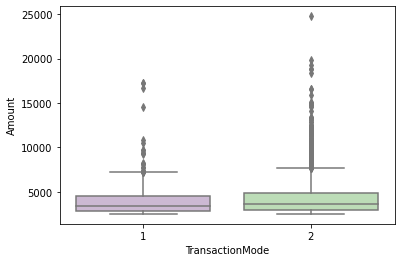

In [16]:
sns.boxplot(x="TransactionMode", y="Amount", data=data, palette="PRGn")
plt.show()

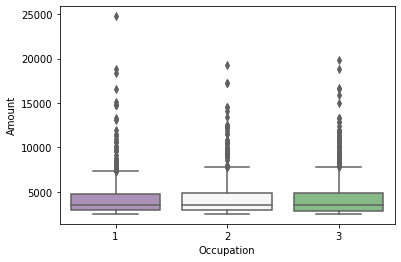

In [17]:
sns.boxplot(x="Occupation", y="Amount", data=data, palette="PRGn")
plt.show()

THERE IS NO MUCH DIFFERENCE DEPENDING UPON THE OCCUPATION


I AM STANDARDIZING THE VALUES AS THERE ARE MORE OUTLIERS

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:

numeric = data.select_dtypes(include=['int64']).columns
categorical = data.select_dtypes(include=['category']).columns
object1=data.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X_numeric_std = pd.DataFrame(data=scaler.fit_transform(data[numeric]), columns=numeric)
data10 = pd.merge(X_numeric_std, data[categorical],left_index=True, right_index=True)
data11=pd.merge(data10,data[object1],left_index=True, right_index=True)
data11.head()

,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,Amount,FamilySize,Distance,TransactionMode,Area,Occupation,PersonID
0,-0.983707,-0.622047,-0.786029,-0.643404,-0.428555,-0.523990,2,6,2,Area1,2,C1104
1,-0.291794,-0.857529,-0.786029,-0.719977,-1.335439,0.525989,2,5,2,Area1,1,C1111
2,0.065322,-0.622047,-0.512409,-0.121452,-0.428555,0.080001,2,6,2,Area1,2,C1117
3,0.768395,4.087588,3.591894,0.701584,4.105865,2.653006,5,7,1,Area1,1,C1128
4,-0.660070,-0.857529,-0.786029,-0.191254,-0.768637,-0.282394,2,7,2,Area1,3,C1132


In [20]:
cols = list(data11.columns)
cols = [cols[-1]] + cols[:-1]
df = data11[cols]
df.head()

,PersonID,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,Amount,FamilySize,Distance,TransactionMode,Area,Occupation
0,C1104,-0.983707,-0.622047,-0.786029,-0.643404,-0.428555,-0.523990,2,6,2,Area1,2
1,C1111,-0.291794,-0.857529,-0.786029,-0.719977,-1.335439,0.525989,2,5,2,Area1,1
2,C1117,0.065322,-0.622047,-0.512409,-0.121452,-0.428555,0.080001,2,6,2,Area1,2
3,C1128,0.768395,4.087588,3.591894,0.701584,4.105865,2.653006,5,7,1,Area1,1
4,C1132,-0.660070,-0.857529,-0.786029,-0.191254,-0.768637,-0.282394,2,7,2,Area1,3


In [21]:
df1=df.pop('Amount')
df['Amount']=df1
df.head()

,PersonID,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,FamilySize,Distance,TransactionMode,Area,Occupation,Amount
0,C1104,-0.983707,-0.622047,-0.786029,-0.643404,-0.428555,2,6,2,Area1,2,-0.523990
1,C1111,-0.291794,-0.857529,-0.786029,-0.719977,-1.335439,2,5,2,Area1,1,0.525989
2,C1117,0.065322,-0.622047,-0.512409,-0.121452,-0.428555,2,6,2,Area1,2,0.080001
3,C1128,0.768395,4.087588,3.591894,0.701584,4.105865,5,7,1,Area1,1,2.653006
4,C1132,-0.660070,-0.857529,-0.786029,-0.191254,-0.768637,2,7,2,Area1,3,-0.282394


**BUILDING A LINEAR REGRESSION MODEL**

In [22]:
x='+'.join(df.columns.values[1:-1])
x
formula = " ~ ".join((df.columns.values[-1],x))
print (formula)
train,test = train_test_split(df,test_size=.30,random_state=123)

Amount ~ Duration+DirectVisits+OnlineVisits+Quantity+NumberofFrequentItems+FamilySize+Distance+TransactionMode+Area+Occupation


In [23]:
print(train.shape)
print(test.shape)

(2056, 12)
(882, 12)


In [24]:
mod_lm = ols(formula=formula, data=df)
res = mod_lm.fit()                           
print(res.summary2())                      

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.720    
Dependent Variable:   Amount            AIC:                 4636.7137
Date:                 2020-03-29 14:08  BIC:                 4870.1476
No. Observations:     2938              Log-Likelihood:      -2279.4  
Df Model:             38                F-statistic:         199.8    
Df Residuals:         2899              Prob (F-statistic):  0.00     
R-squared:            0.724             Scale:               0.28003  
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.2510   0.1549  -1.6202 0.1053 -0.5548  0.0528
FamilySize[T.3]       -0.0066   0.0251  -0.2650 0.7910 -0.0558  0.0425
FamilySize[T.4]       -0.0315   0.0332  -0.9504 0.3420 -0.0965  0.0335
FamilySize[T.5]       -0.0

**RESIDUAL VS FIITED PLOT**

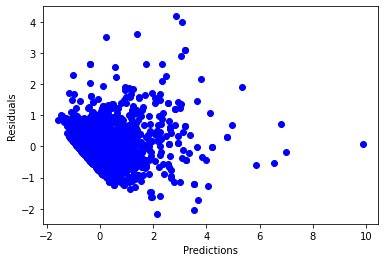

In [25]:
preds_tr=res.predict(exog=df)
plt.figure()
plt.plot(preds_tr,res.resid,'bo')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show(block=True)

**WE ARE CHECKING MULTI COLLINEARITY BY USING VIF**

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric = df.select_dtypes(include=['float64']).columns
numeric

Index(['Duration', 'DirectVisits', 'OnlineVisits', 'Quantity',
       'NumberofFrequentItems', 'Amount'],
      dtype='object')

In [27]:
Xdata=df[numeric]
Xdata['intercept']=1
Xdata=Xdata[['Duration', 'DirectVisits', 'OnlineVisits', 'Quantity',
       'NumberofFrequentItems','intercept']]
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
vif

,Vif,Variables
0,1.080395,Duration
1,20.037276,DirectVisits
2,8.249601,OnlineVisits
3,1.161296,Quantity
4,10.390286,NumberofFrequentItems
5,1.000000,intercept


In [0]:
data2=df

In [30]:
lm_mod3=ols(formula,data=data2,drop_cols=['DirectVisits'])
result1 = lm_mod3.fit()
print(result1.summary2())

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.668    
Dependent Variable:   Amount            AIC:                 5137.6683
Date:                 2020-03-29 14:08  BIC:                 5365.1167
No. Observations:     2938              Log-Likelihood:      -2530.8  
Df Model:             37                F-statistic:         160.7    
Df Residuals:         2900              Prob (F-statistic):  0.00     
R-squared:            0.672             Scale:               0.33220  
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.2624   0.1687  -1.5550 0.1201 -0.5932  0.0685
FamilySize[T.3]       -0.0044   0.0273  -0.1619 0.8714 -0.0580  0.0491
FamilySize[T.4]        0.0025   0.0361   0.0695 0.9446 -0.0682  0.0733
FamilySize[T.5]       -0.0

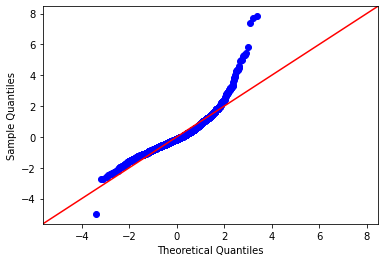

In [31]:
inf=result1.get_influence()
sm.qqplot(inf.resid_studentized_internal,line='45')
plt.show(block=True)

In [32]:
Xdata=data2[numeric]
Xdata['intercept']=1
Xdata=Xdata[['Duration', 'OnlineVisits', 'Quantity',
       'NumberofFrequentItems','intercept']]
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
vif

,Vif,Variables
0,1.078322,Duration
1,4.159316,OnlineVisits
2,1.154606,Quantity
3,4.111909,NumberofFrequentItems
4,1.000000,intercept


AS THERE IS MORE CHANGE IN VIF OF THE COLUMNS AFTER DROPPING DIRECTVISITS WE OREFER TO DROP THAT COLUMN 

In [54]:
mod_lm = ols(formula=formula, data=train) 
res5 = mod_lm.fit()                           
print(res5.summary2())     

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.711    
Dependent Variable:   Amount            AIC:                 3220.7325
Date:                 2020-03-29 14:21  BIC:                 3440.2447
No. Observations:     2056              Log-Likelihood:      -1571.4  
Df Model:             38                F-statistic:         133.8    
Df Residuals:         2017              Prob (F-statistic):  0.00     
R-squared:            0.716             Scale:               0.27523  
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.3235   0.1772  -1.8259 0.0680 -0.6710  0.0240
FamilySize[T.3]        0.0035   0.0297   0.1161 0.9076 -0.0548  0.0617
FamilySize[T.4]        0.0034   0.0390   0.0872 0.9305 -0.0731  0.0799
FamilySize[T.5]       -0.0

**ERROR METRICS**

In [49]:
pred_test=result1.predict(test)
MAE=np.mean(abs(np.array(test.iloc[:,-1])-np.array(pred_test)))
print("The Mean Absolute Error on test data is: ",MAE)

The Mean Absolute Error on test data is:  0.41376613569726733


In [50]:
MAPE=np.mean(abs((np.array(test.iloc[:,-1])-np.array(pred_test))/np.array(test.iloc[:,-1])))
print("The Mean Absolute Percentage Error on test data is: ",MAPE*100)

The Mean Absolute Percentage Error on test data is:  170.85729215150073


In [51]:
RMSE=np.sqrt(np.mean((np.array(test.iloc[:,-1])-np.array(pred_test))**2))

print("The Root Mean Square Error on test data is: ",RMSE)

The Root Mean Square Error on test data is:  0.590966524292503


In [52]:
MSE=np.mean((np.array(test.iloc[:,-1])-np.array(pred_test))**2)
print("The Mean Square Error on test data is: ",MSE)

The Mean Square Error on test data is:  0.34924143283436143


In [53]:
pred=result1.predict(train)
MSE=np.mean((np.array(train.iloc[:,-1])-np.array(pred))**2)
print("The Mean Square Error on test data is: ",MSE)

The Mean Square Error on test data is:  0.3187435585149024
